# Выявление закономерностей, определяющих успешность игры

## Описание проекта

Нужно выявить определяющие успешность игры закономерностив в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Вывод

Максимальный пик выпуска видеоигр пришелся на 2005 и 2010 годы. Незначительный рост также пришелся на 2016 год. Причем рост этот последовал после значительного снижения выпуска. Данные с 1980-1995 вообще не стали брать в расчет, так как доля выпуска игр там минимальная. Спад 2010-2015 годов тоже не подходит для исследовиная, так как в 2015-2016 годах наметился выраженный рост.
Судя по графикам срок "жизни" платформы не превышает 10 лет, а срок популятности 5 лет. Все платформы из топа на момент необходимости исследования уже не популярны. Американец: играет в шутеры на PS4 Европеец: играет в шутеры и экшн игры на PS4 Японец: играет в экшн игры на 3DS. В японии популярны жанры "без названия", возможно это какие-то японские игры, не имеющие рейтинга европейской и американской системы оценки. 

In [1]:
# запускаю все библиотеки
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# открываю файл с данными
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# приведу названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [4]:
# изучение тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрю статические данные
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
user_score,40.09%
rating,40.48%


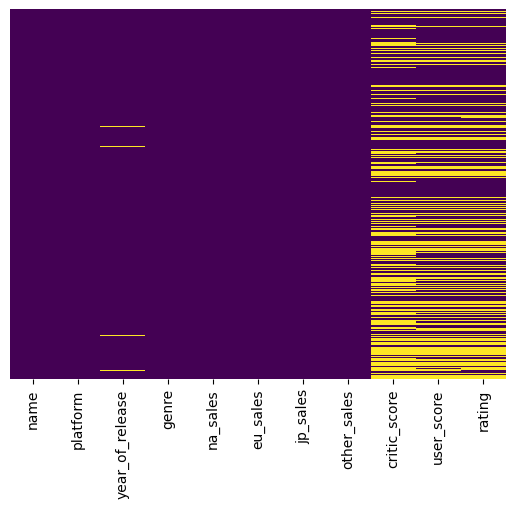

In [6]:
# анализ пропусков
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# пропуски в процентном отношении
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

In [7]:
# общее кол-во пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### в столбце name нет 2-х значений - возможно не заполнили из-за тех. ошибки - можно удалить
### в столбце `year_of_release` нет 269-и значений - год выпуска не известен или очень старая игра
### отсутствие значений в `critic_score` и `user_score`объясняется ленью пользователей
### отсутствие значений в `rating`говорит о том, что игра подходит для всех!!!

In [8]:
# проверка на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет.
Строки с пропусками в name и genre (которые сосуществуют вместе - двух играх) можно удалить, поскольку почти ничего не знаем об этих играх + их меньше 0,01%. Пропуски в строке year_of_release не совсем понятно, чем можно их заменить, так как средним и медианным значением замена будет неккоректна. А так как их количество составляет всего 1,6%, то можно их удалить.

In [9]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['genre'])
data = data.dropna(subset = ['year_of_release'])

In [10]:
# посмотрим на уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD — это сокращение произошло от выражения "to be determined" По сути, всё, что требует конкретного ответа, которого вы ещё не знаете, может быть «tbd».
Получается «tbd», это такие же неопределенные значения, как и nan. Заменим их и nan на "заглушку".

In [11]:
data['user_score'] = data['user_score'].fillna( '-10' ) 
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-10'
data['user_score'].value_counts()

-10    8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Данные из Википедии: Все (E) Подросток (Т) Зрелые 17+(М) Все 10+ (E10+) Раннее детство (EC) Старый вариант маркировки E (К-А) Только для взрослых 18+(АО) Рейтинг в ожидании (RP) Удалить строки с пропусками мы не можем, так как они составляют почти половину датасета. В данном случае следует поставить "заглушку". Исходя из этого можно заменить 'RP' и 'nan' на 'Unknown', 'K-A' на 'E'.

In [12]:
data['rating'] = data['rating'].fillna('Unknown') 
data.loc[data['rating']== 'RP' ,'rating'] = 'Unknown'  
data.loc[data['rating'].isin(['K-A']),'rating'] = 'E'  
data['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Как и в случае с rating пропущенных значений очень много и не предоставляется возможным их восстановить, также ставим заглушку '-10', так как нам нужны данные типа float для дальнейших анализов, а отрицательных рейтингов у нас нет, так что мы в дальнейшем сможем опознать пропущенные значения.

In [13]:
data['critic_score'] = data['critic_score'].fillna( '-10' ) 
data['critic_score'].unique()

array([76.0, '-10', 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0,
       77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0,
       73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0,
       66.0, 56.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0, 69.0, 50.0,
       25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0, 20.0,
       53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0, 40.0,
       46.0, 39.0, 34.0, 41.0, 36.0, 31.0, 27.0, 35.0, 26.0, 19.0, 28.0,
       23.0, 24.0, 21.0, 17.0, 13.0], dtype=object)

Перевод данных в столбце 'critic_score' и 'user_score' в тип float64, а года в столбце year_of_release к целочисленному типу int

In [14]:
data['critic_score'] = data['critic_score'].astype('float64') 
data['user_score'] = data['user_score'].astype('float64') 
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [15]:
# Расчёт суммарных продаж в регионах и создание отдельного столбца
data['total_sales']= data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Исследовательский анализ данных

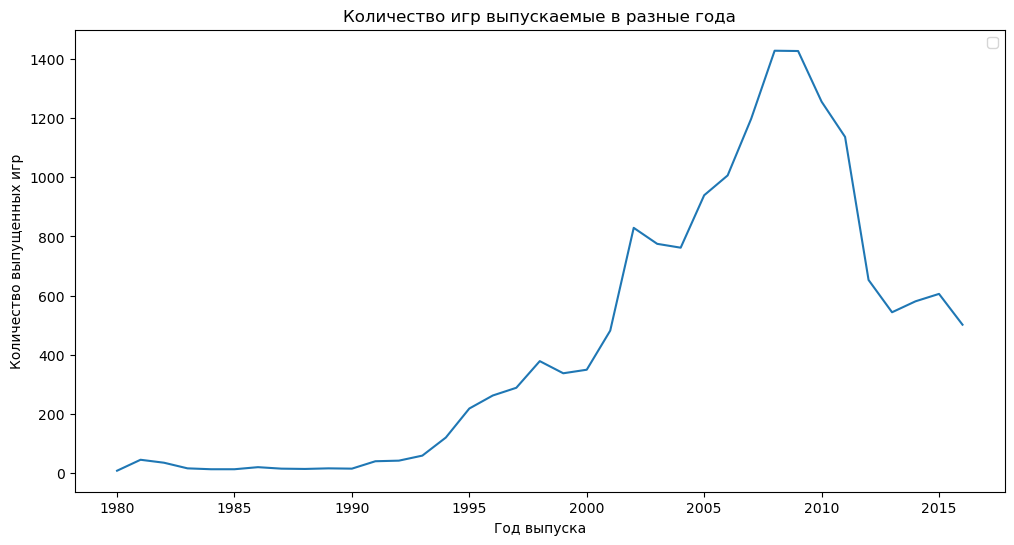

In [16]:
data_pivot_year_of_release=data.pivot_table(
    index='year_of_release', values='total_sales', aggfunc={'count'})
plt.figure(figsize=(12,6))
sns.lineplot(data=data_pivot_year_of_release)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

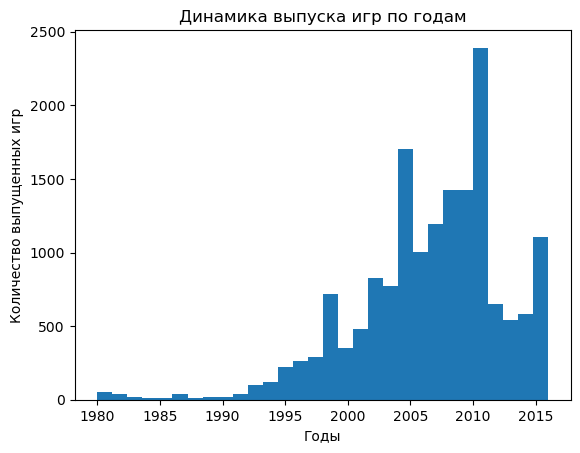

In [17]:
data_pivot_year_of_release=data.pivot_table(
    index='year_of_release', values='total_sales', aggfunc={'count'})
plt.hist(data['year_of_release'], bins=30)
plt.title('Динамика выпуска игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр')
plt.show()

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.
- Данные с 1980-1995 вообще не сроит брать в расчет, так как доля выпуска игр там минимальная. Спад 2010-2015 годов тоже не подходит для исследовиная, так как в 2015-2016 годах наметился выраженный рост. Скорее всего правильнее будет взять для исследования прогнозов на 2017 год данные за предыдущий, 2016 год. Хоть мы и имеем информацию что данные по нему неполные.

In [18]:
# Определенип платформы с наибольшими суммарными продажами и посмотрю распределение по годам.
data_pivot_platform=data.pivot_table(index='platform', values='total_sales', aggfunc={'sum'}).sort_values('sum', ascending=False)
data_pivot_platform.head(10)

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


PS2


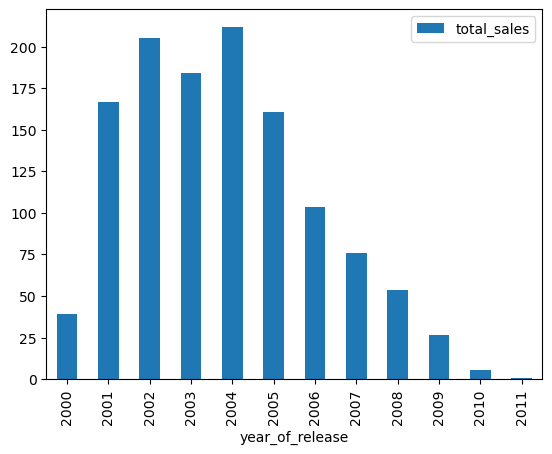

X360


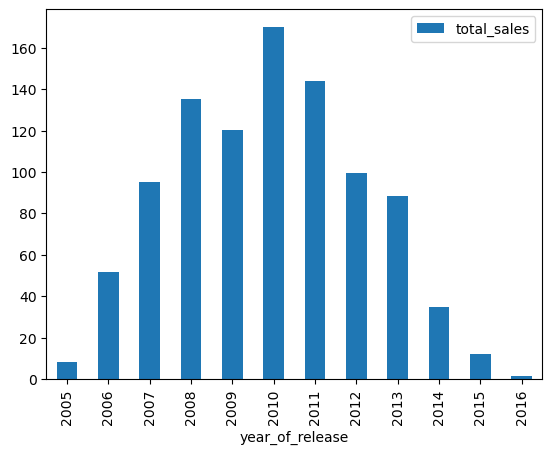

PS3


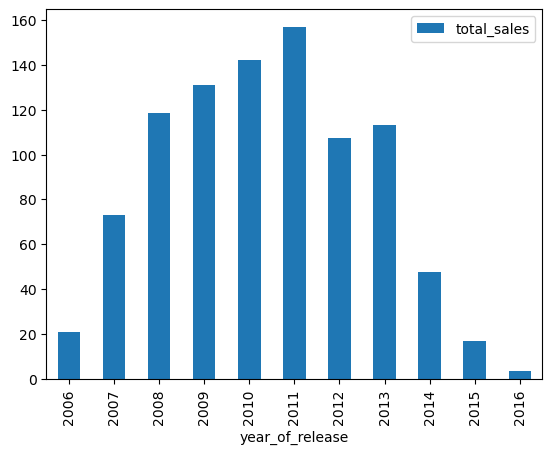

Wii


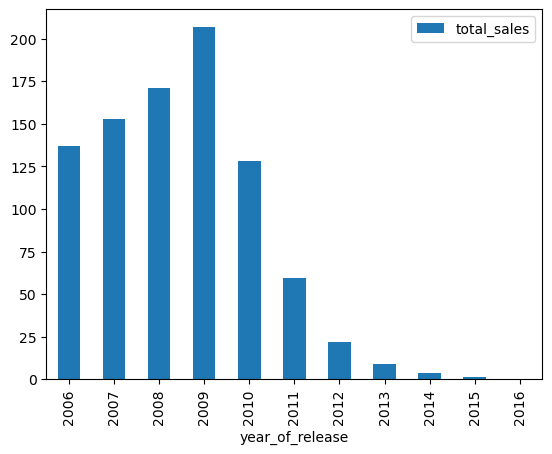

DS


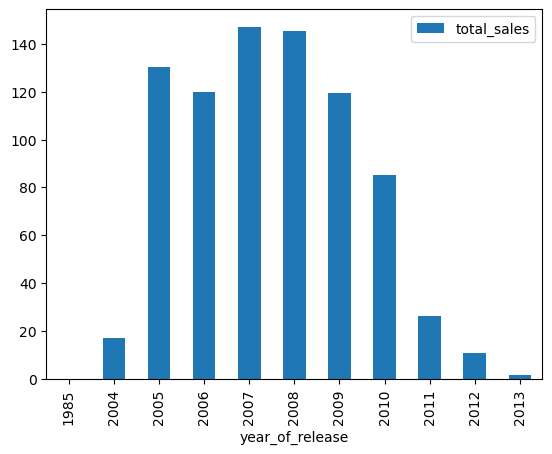

PS


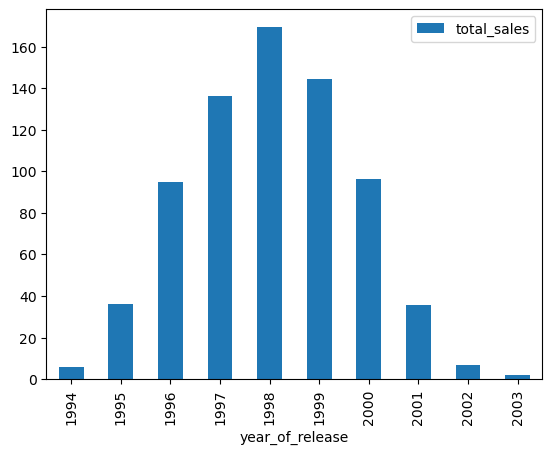

PS4


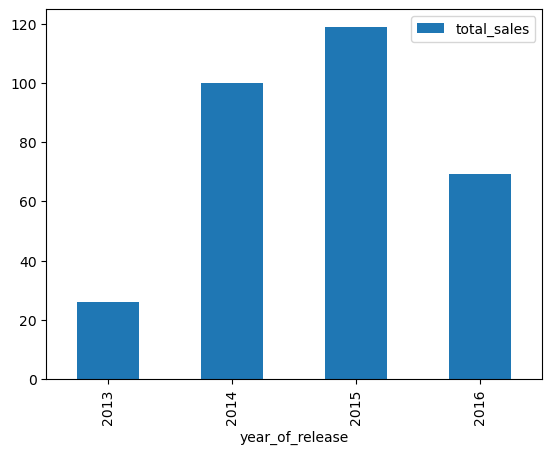

GBA


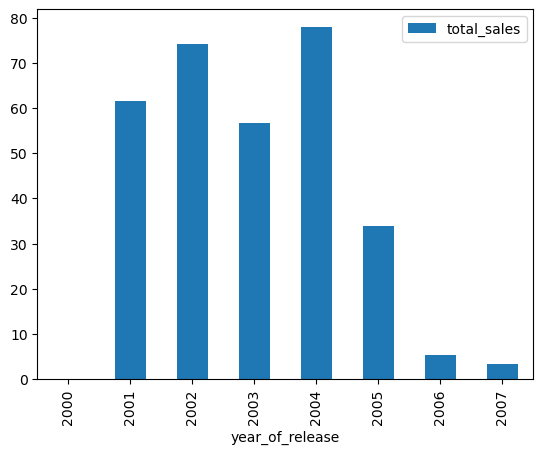

PSP


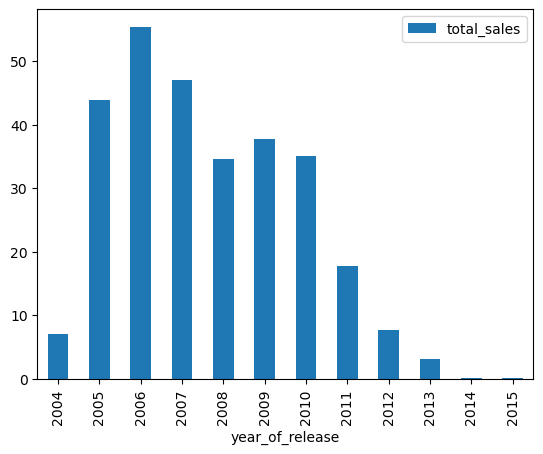

3DS


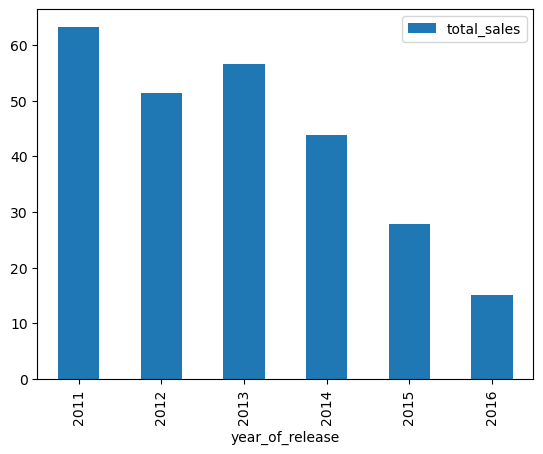

In [19]:
for platform in data_pivot_platform.index[:10]:
    print(platform)
    (data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar'))
    
    plt.show()


Судя по графикам срок "жизни" платформы не превышает 10 лет, а срок популятности 5 лет. Все платформы из топа на момент необходимости исследования уже не популярны.

- Основываясь на данных, приведенных выше, возьмем за актуальные данные период 2015-2016 гг. В 2015 году как раз заканчивается спад выпуска игр, а 2016 год представлен не полностью.

In [20]:
actual_data = data.query('year_of_release >= 2015')
actual_data.sort_values(by='total_sales', ascending = False).head(20)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,Unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.0,-10.0,Unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-10.0,-10.0,Unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-10.0,-10.0,Unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


In [21]:
actual_data_sales=actual_data.pivot_table(index='platform', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending = False)
actual_data_sales

,sum
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


PS4


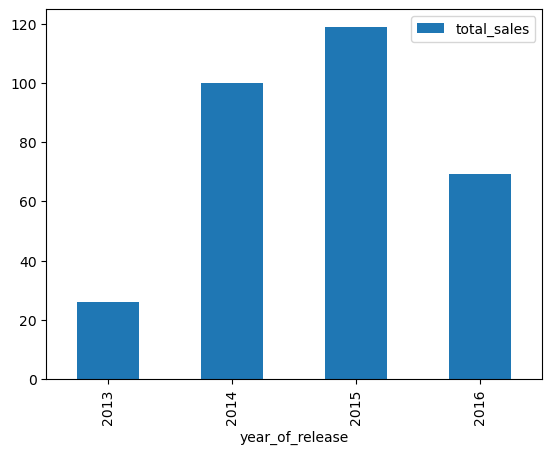

XOne


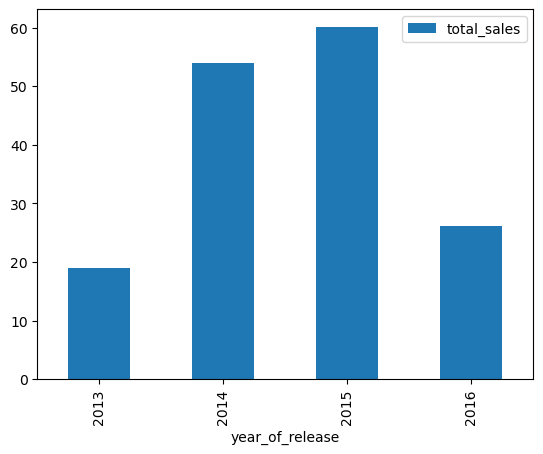

3DS


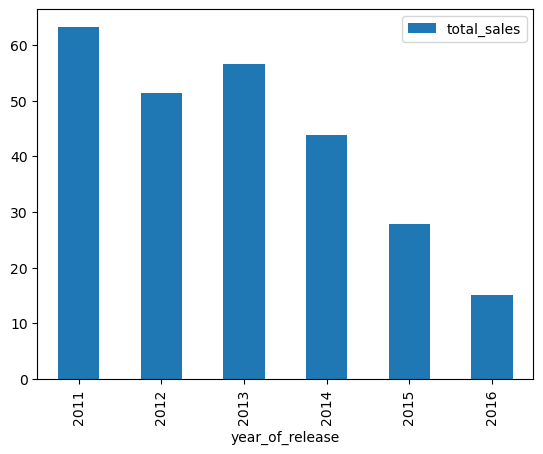

WiiU


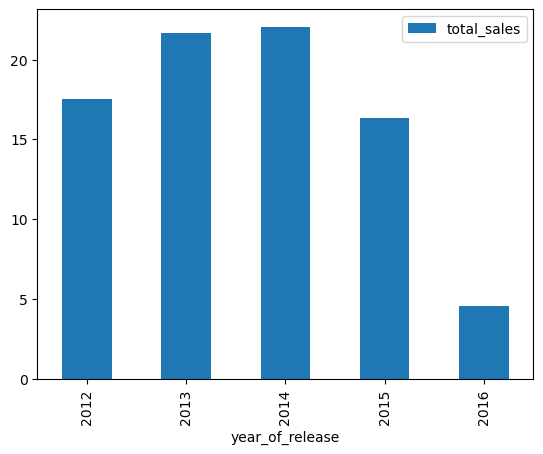

PS3


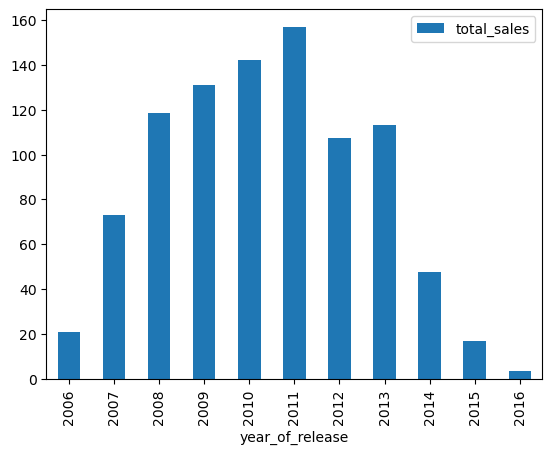

PC


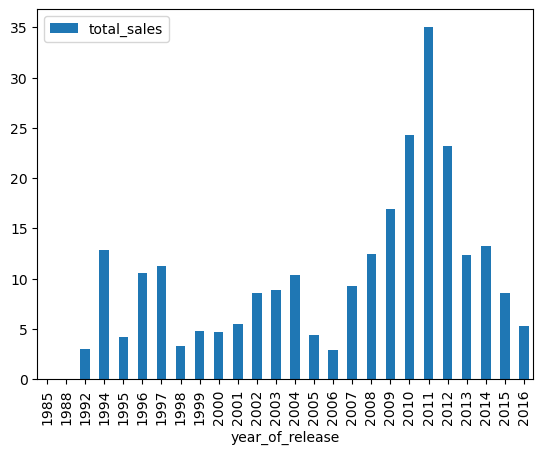

X360


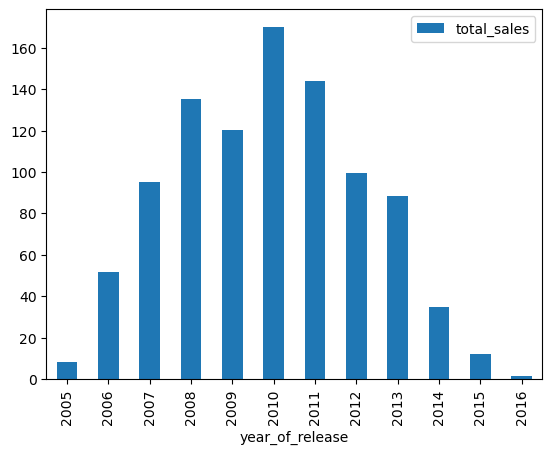

PSV


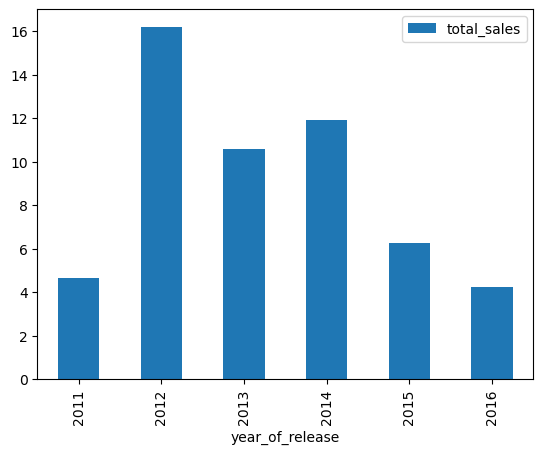

Wii


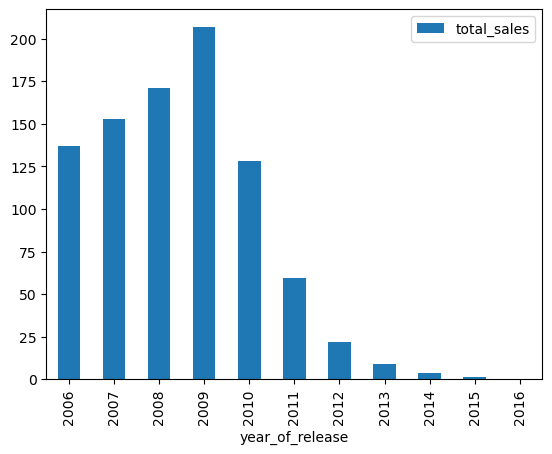

PSP


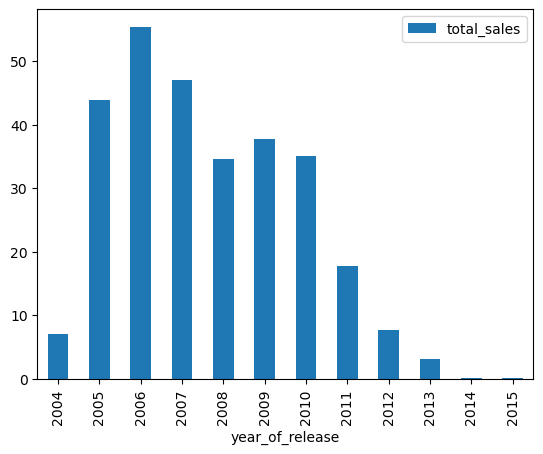

In [22]:
for platform in actual_data_sales.index[:10]:
    print(platform)
    (data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar'))
    
    plt.show()

### Вывод: почти по всем лидирующим платформам наблюдается спад продаж. Но так как у нас нет заключительных данных предположим, что потенциально прибыльные платформы, судя по графику, это: PS4, XOne, PC, PSV

In [23]:
# Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам.
actual_games = actual_data.query('platform not in ["3DS","WiiU", "PS3", "X360", "Wii", "PSP"]' )
actual_games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,Unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.0,-10.0,Unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-10.0,-10.0,Unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16684,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01


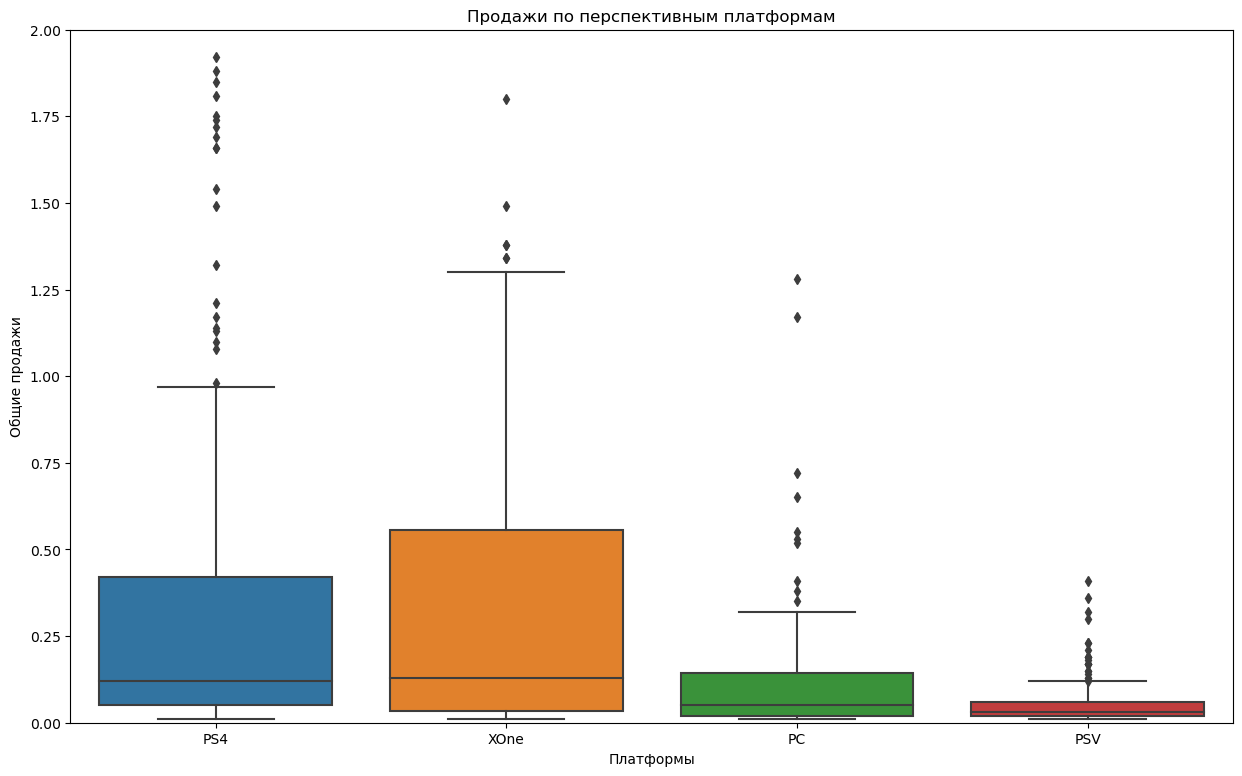

In [24]:
plt.figure (figsize=(15, 9))
(sns.boxplot(data = actual_games, y = 'total_sales', x='platform').set(title = 'Продажи по перспективным платформам', 
 xlabel = 'Платформы', 
 ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()


 - Судя по графику, платформы PC и PSV нам не подходят, у PS4 и XOne распределение продаж примерно на одном уровне, медиана тоже на оном уровне, а также общие продажи у них достаточно высокие.

 - Судя по графику к нашим двум платформам стоит добавить еще и WiiU, которую мы ранее отбросили. Она тоже достаточно перспективная.


In [25]:
actual_games = actual_data.query('platform not in ["3DS","PC","PSV", "PS3", "X360", "Wii", "PSP"]' )
actual_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2015.519608,0.241216,0.231627,0.032059,0.074294,42.537255,1.172157,0.579196
std,0.500106,0.545178,0.603414,0.095390,0.187350,40.957182,7.998043,1.271565
min,2015.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000,0.010000
25%,2015.000000,0.010000,0.010000,0.000000,0.000000,-10.000000,-10.000000,0.042500
50%,2016.000000,0.050000,0.050000,0.000000,0.010000,65.000000,6.100000,0.130000
75%,2016.000000,0.220000,0.190000,0.030000,0.060000,77.000000,7.500000,0.480000
max,2016.000000,6.030000,6.120000,1.460000,2.380000,95.000000,9.200000,14.630000


### Влияние на продажи внутри одной популярной платформы отзывы читателей и критиков. Построение диаграммы рассеяния и расчёт корреляции между отзывами и продажами. Начнем с PS4.


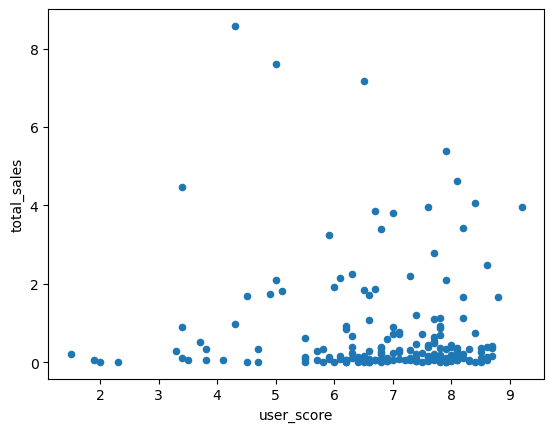

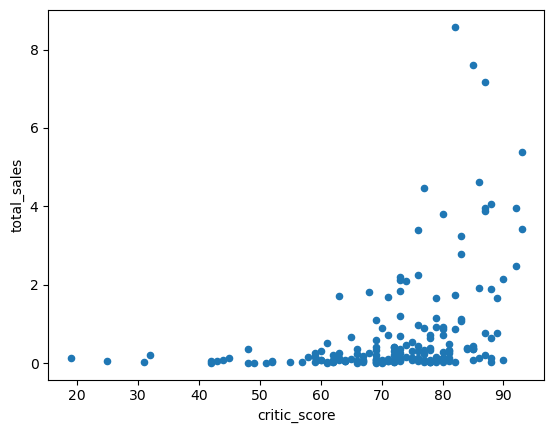

In [26]:
actual_games_PS4 = actual_games.query('platform == "PS4" & critic_score != -10 & user_score != -10')
actual_games_PS4[actual_games_PS4['user_score'] !='-10'].plot( kind= 'scatter', x='user_score', y='total_sales')
actual_games_PS4[actual_games_PS4['critic_score'] != '-10'].plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()


In [27]:
actual_games_PS4[(actual_games_PS4['critic_score'] !='-10') & (actual_games_PS4['user_score']!='-10')] .corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.151687,-0.081229,-0.143301,-0.125987,-0.019769,-0.000332,-0.124073
na_sales,-0.151687,1.000000,0.612675,0.495716,0.880278,0.405491,-0.030915,0.848279
eu_sales,-0.081229,0.612675,1.000000,0.455742,0.914159,0.309869,-0.091554,0.937074
jp_sales,-0.143301,0.495716,0.455742,1.000000,0.527864,0.366655,0.188618,0.555502
other_sales,-0.125987,0.880278,0.914159,0.527864,1.000000,0.394093,-0.070394,0.997212
critic_score,-0.019769,0.405491,0.309869,0.366655,0.394093,1.000000,0.533330,0.392074
user_score,-0.000332,-0.030915,-0.091554,0.188618,-0.070394,0.533330,1.000000,-0.064368
total_sales,-0.124073,0.848279,0.937074,0.555502,0.997212,0.392074,-0.064368,1.000000


### Вывод оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.

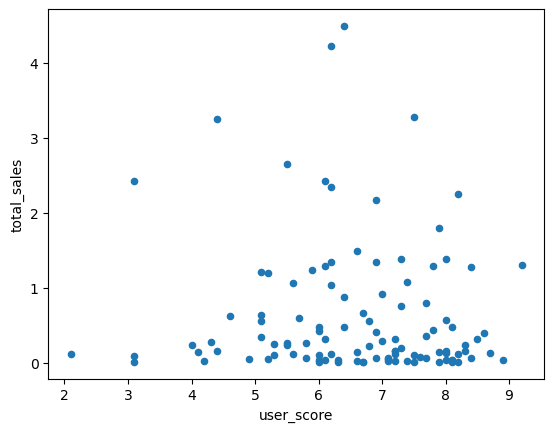

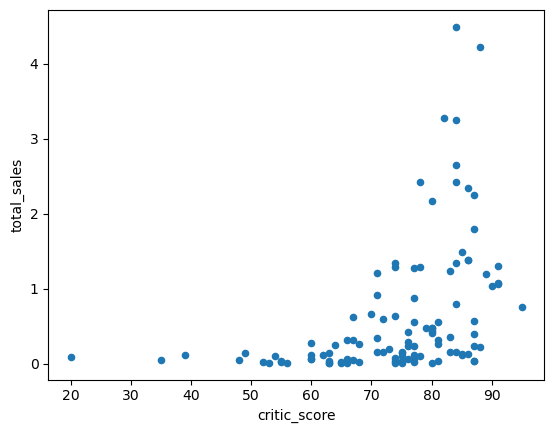

In [28]:
actual_games_XOne = actual_games.query('platform == "XOne" & critic_score != -10 & user_score != -10')
actual_games_XOne[actual_games_XOne['user_score'] !='-10'].plot( kind= 'scatter', x='user_score', y='total_sales')
actual_games_XOne[actual_games_XOne['critic_score'] != '-10'].plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()


In [29]:
actual_games_XOne[(actual_games_XOne['critic_score'] !='-10') & (actual_games_XOne['user_score']!='-10')] .corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.284255,-0.165198,-0.245829,-0.285808,-0.001112,0.054484,-0.270562
na_sales,-0.284255,1.000000,0.553023,0.398726,0.975378,0.397656,-0.040900,0.935263
eu_sales,-0.165198,0.553023,1.000000,0.407230,0.720626,0.338325,-0.095630,0.812086
jp_sales,-0.245829,0.398726,0.407230,1.000000,0.434371,0.203343,0.101729,0.456305
other_sales,-0.285808,0.975378,0.720626,0.434371,1.000000,0.421362,-0.060920,0.989316
critic_score,-0.001112,0.397656,0.338325,0.203343,0.421362,1.000000,0.459443,0.422519
user_score,0.054484,-0.040900,-0.095630,0.101729,-0.060920,0.459443,1.000000,-0.068684
total_sales,-0.270562,0.935263,0.812086,0.456305,0.989316,0.422519,-0.068684,1.000000


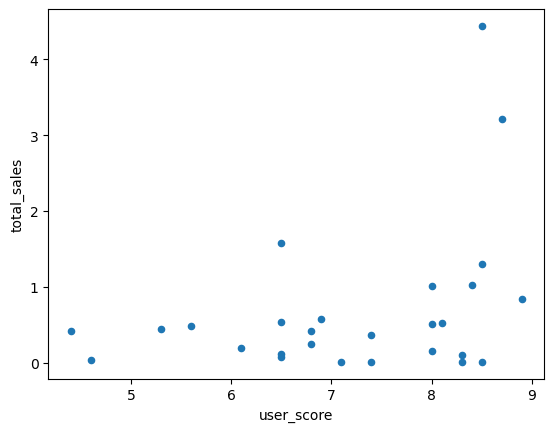

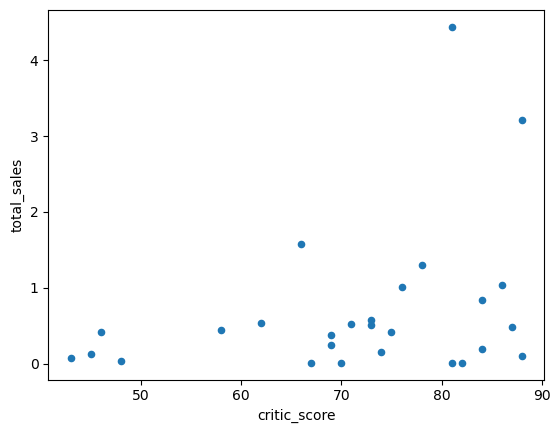

In [30]:
actual_games_WiiU = actual_games.query('platform == "WiiU" & critic_score != -10 & user_score != -10')
actual_games_WiiU[actual_games_WiiU['user_score'] !='-10'].plot( kind= 'scatter', x='user_score', y='total_sales')
actual_games_WiiU[actual_games_WiiU['critic_score'] != '-10'].plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()


In [31]:
actual_games_WiiU[(actual_games_WiiU['critic_score'] !='-10') & (actual_games_WiiU['user_score']!='-10')] .corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.162911,-0.206739,-0.181741,-0.175035,0.048534,0.055179,-0.185034
na_sales,-0.162911,1.000000,0.989843,0.907392,0.999072,0.348668,0.367370,0.987825
eu_sales,-0.206739,0.989843,1.000000,0.922899,0.991534,0.344203,0.354382,0.991413
jp_sales,-0.181741,0.907392,0.922899,1.000000,0.911510,0.258331,0.316076,0.959893
other_sales,-0.175035,0.999072,0.991534,0.911510,1.000000,0.349204,0.369559,0.989325
critic_score,0.048534,0.348668,0.344203,0.258331,0.349204,1.000000,0.678858,0.325674
user_score,0.055179,0.367370,0.354382,0.316076,0.369559,0.678858,1.000000,0.354987
total_sales,-0.185034,0.987825,0.991413,0.959893,0.989325,0.325674,0.354987,1.000000


In [32]:
# общее распределние игр по жанрам, какие жанры саме прибыльные.

actual_data_genre=actual_data.pivot_table(index='genre', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending = False)
actual_data_genre


,sum
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


In [33]:
# Изучение 4 самых прибыльных
actual_genre = actual_data.query('genre not in ["Misc","Fighting", "Adventure", "Racing", "Platform", "Simulation","Strategy","Puzzle"]')
actual_genre


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10.0,-10.0,Unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-10.0,-10.0,Unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-10.0,-10.0,Unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-10.0,-10.0,Unknown,0.01


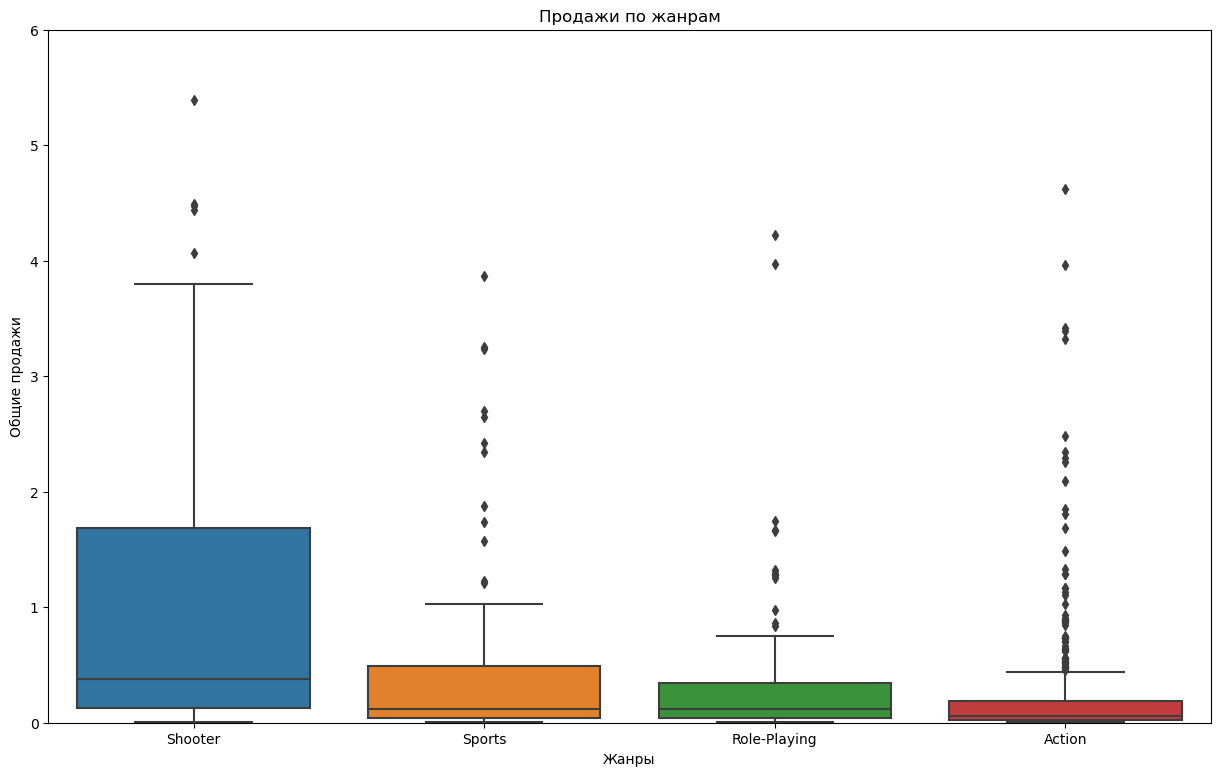

In [34]:
plt.figure (figsize=(15, 9))
(sns.boxplot(data = actual_genre, y = 'total_sales', x='genre').set(title = 'Продажи по жанрам', 
 xlabel = 'Жанры', 
 ylabel = 'Общие продажи', ylim=(0, 6)))
plt.show()


### самый популярный жанр это Шутеры, хорошо продаются спортивные и ролевые игры.


- Портрет пользователя каждого региона

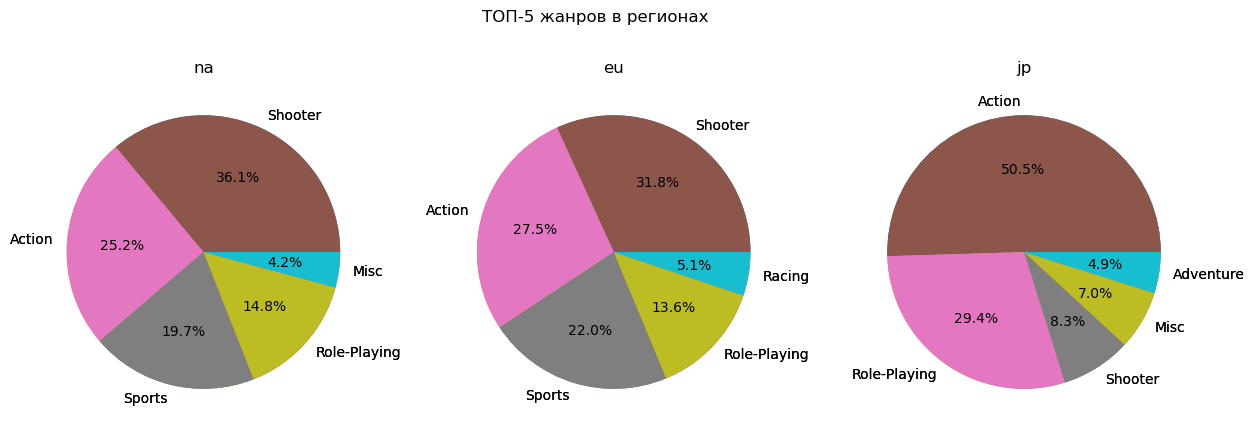

In [35]:
recipe = actual_data.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for  i  in range ( 3 ):
    df_i = (actual_data.groupby('genre')[recipe[i]].sum().reset_index().sort_values(recipe[i], ascending= False, ignore_index = True).head()) 
    axs[i].pie(df_i[recipe[i]], labels = df_i['genre'])
    axs[i].pie(df_i[recipe[i]], labels = df_i['genre'], autopct= '%1.1f%%' )
    axs[i].set_title(df_i.columns[1].split('_')[0]) 
plt.show()


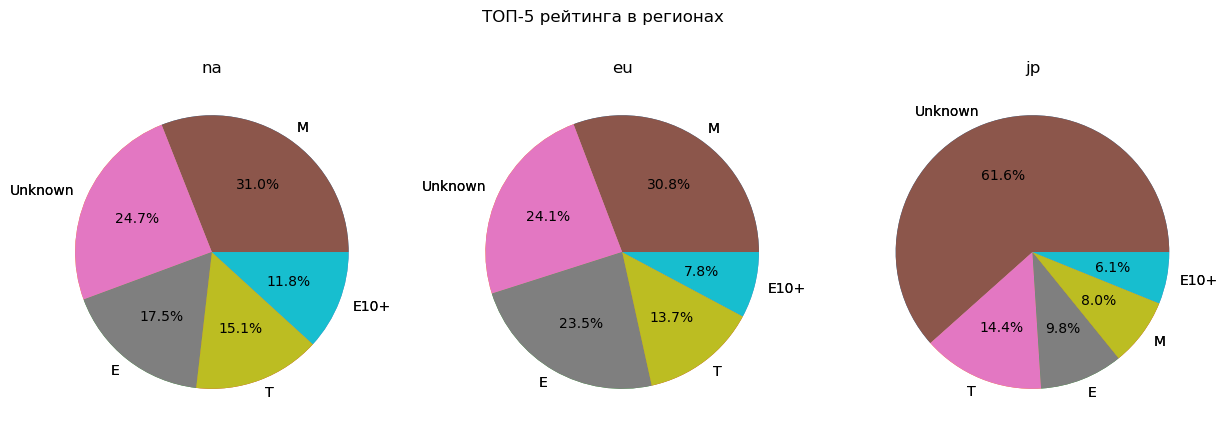

In [38]:
recipe = actual_data.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 рейтинга в регионах')
for  i  in range ( 3 ):
    df_i = (actual_data.groupby('rating')[recipe[i]].sum().reset_index().sort_values(recipe[i], ascending= False, ignore_index = True).head()) 
    axs[i].pie(df_i[recipe[i]], labels = df_i['rating'])
    axs[i].pie(df_i[recipe[i]], labels = df_i['rating'], autopct= '%1.1f%%' )
    axs[i].set_title(df_i.columns[1].split('_')[0]) 
plt.show()


- рейтинг ESRB не имеет значительного влияния на продажи в Японии.


# Проверка гипотез

Статистика разности показывант отношение между Нулевой гипетезой и средним выборки. Для осуществления этого определены условия: выборочные средние нормально распределены , генеральные совокупности не должны быть зависимы друг от друга, дисперсии рассматриваемых равны(мы на всякий случай указываем equal_var=False, если это не так). Но при всем при этом, если эмпирических значений не много, то распределение нулевой гипотезы будет шире нормального (иметь большой разброс). Существует понятие - Количество степеней свободы - это 1- количество наблюдений в выборке. Чтобы каждый раз не проверять количество степеней свободы, принято применять T-test в любом случае, как правило хорошего тона. Ведь он работает на выборке любого размера.


In [39]:
# Но- средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
# Н1- средние пользовательские рейтинги платформ Xbox One и PC разные.
# удалим значения заглушки
check = actual_data[actual_data['user_score'] != - 10]

print('Средний пользовательский рейтинг платформ Xbox One', round(check.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(check.query('platform == "PC"')['user_score'].mean(),2))

from scipy import stats as st

alpha = .05 
results = st.ttest_ind(
    check.query('platform == "XOne"')['user_score'],check.query('platform == "PC"')['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


Средний пользовательский рейтинг платформ Xbox One 6.54
Средний пользовательский рейтинг платформ PC 6.3
p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


In [40]:
# Но- средние пользователькие рейтинги жанров Action и Sport одинаковые. 
# Н1- средние пользователькие рейтинги жанров Action и Sport разные.
print('Средний пользовательский рейтинг жанра Action', round(check.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sports', round(check.query('genre == "Sports"')['user_score'].mean(),2))

alpha = .05 
results = st.ttest_ind(
    check.query('genre == "Action"')['user_score'],check.query('genre == "Sports"')['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний пользовательский рейтинг жанра Action 6.81
Средний пользовательский рейтинг жанра Sports 5.2
p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


## Общий вывод

<b> В ПЕРВОМ разделе мы открыли файл, изучили данные и наметили задачи по подготовке данных к исследованию. Которые в дальнейшем и выполнили:

- заменили названия столбцов (привели к нижнему регистру)

- преобразовали тип данных в столбцах: year_of_release - привели к целочисленному типу int, critic_score и user_score привели к типу float64

- изучили пропуски в таблице

- Удалили строки с незначительными пропусками в столбцах name , genre и year_of_release

- В столбцах user_score, rating, critic_score было огромное количество пропусков(половина всего датасета), убрать такое количество данных не представляется возможным. Поразмышляем, откуда может быть такое количество пропусков в данных. Если бы это была ошибка оператора ввода или машины при обработке данных, врядли эти ошибки занимали бы половину всех данных. Причем пропуски почти всегда повторяются по всем трем столбцам строки, то есть, есть система. Это наводит на мысль, что, может быть, в некоторых странах игры не имеют рейтинга, или составители по стране (игре) просто его не указывают. Тот же вывод напрашивается и на оценку пользователей. Так как такие значения мы не можем заменить ни средним, ни медианой то просто поставили "Заглушку" на значения nan, чтобы привести тип данных в строке в типу float.

- значение TBD — это сокращение произошло от выражения "to be determined". По сути, всё, что требует конкретного ответа, которого вы ещё не знаете, может быть «tbd», то есть это теже nan, поступили с ними соответственно.

- изучили данные по столбцу rating : .Все (E) .Подросток (Т) .Зрелые 17+(М) .Все 10+ (E10+) .Раннее детство (EC) .Старый вариант маркировки E (К-А) .Только для взрослых 18+(АО) .Рейтинг в ожидании (RP)

- Удалить строки с пропусками мы не можем, так как они составляют почти половину датасета. В данном случае следует поставить "заглушку". Исходя из этого заменили 'RP' и 'nan' на 'Unknown', 'K-A' на 'E'. Можно было бы подумать о замене M на AO, но фильмы для врослых все же отличаются от фильмов для "взрослых 18+". Так что оставили как есть.

- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

<b> Во ВТОРОМ разделе нашего исследования мы проводили исследовательский анализ подготовленных данных.

- Начали мы с того, что посмотрели сколько игр выпускалось в разные годы:

Максимальный пик выпуска видеоигр пришелся на 2005 и 2010 годы. Незначительный рост также пришелся на 2016 год. Причем рост этот последовал после значительного снижения выпуска. Данные с 1980-1995 вообще не стали брать в расчет, так как доля выпуска игр там минимальная. Спад 2010-2015 годов тоже не подходит для исследовиная, так как в 2015-2016 годах наметился выраженный рост. Для исследования прогнозов на 2017 год мы взяли данные за 2015 год и данные за предыдущий, 2016 год. Хоть мы и имеем информацию что данные по нему неполные.

- Далее мы смотрели как меняются продажи по платформам. Выбрали платформы с максимальными продажами и построили распределение по годам.

Судя по графикам срок "жизни" платформы не превышает 10 лет, а срок популятности 5 лет. Все платформы из топа на момент необходимости исследования уже не популярны.

- затем мы смотрели какие платформы лидируют по продажам и выбрали несколько потенциально вприбыльных платформ

Судя по графику у PS4 и XOne распределение продаж примерно на одном уровне, медиана тоже на оном уровне, а также общие продажи у них достаточно высокие. После того как мы построили "ящик с усами" для наших выбранных платформ мы добавили еще и WiiU, которую мы ранее отбросили. Она тоже достаточно перспективная. А вот платформы PC и PSV нам не подходят.

- далее мы изучали как влияют на продажи внутри каждой выбранной нами популярной платфрмы отзывы пользователей и критиков

В случае с PS4 корреляция продаж с оценкой критиков 0.392074 , корреляция продаж с оценкой пользователей -0.064368. Сделаем вывод, что чем выше оценка критиков, тем выше продажи. А вот оценка пользователей на продажи не влияет.

Теперь посмотрим, как обстоят дела с XOne, наблюдаем ту же самую картину, как и в случае с PS4. Корреляция продаж с оценкой критиков 0.422519 , корреляция продаж с оценкой пользователей -0.068684. Вывод тот же: чем выше оценка критиков, тем выше продажи,а оценка пользователей на продажи не влияет.

И у нас осталась платформа WiiU. Тут мы наблюдаем другую картину. Корреляция продаж с оценкой критиков 0.325674 , корреляция продаж с оценкой пользователей -0.0354987. Мы видим прямую корреляцию и в случае с критиками и с пользователями . Получается, на этой платформе чем выше отзывы критиков и пользователей, тем продажи выше(причем мнение пользователей выше оценивается, чем мнение критиков).

<b> В ТРЕТЬЕЙ части нашего исследования, посмотрев на общее распределение игр по жанрам мы увидели, что самый популярный жанр это Шутеры, хорошо продаются также спортивные и ролевые игры.

- Построив круговые диаграмы для пользователей каждого региона мы увидели, что:

`Американец: играет в шутеры на PS4`
    
`Европеец: играет в шутеры и экшн игры на PS4`
    
`Японец: играет в экшн игры на 3DS. В японии популярны жанры "без названия", возможно это какие-то японские игры, не имеющие рейтинга европейской и американской системы оценки.`
    
<b> В ЧЕТВЕРТОЙ части исследования нас ждала Проверка гипотез. Так как нулевая гипотеза всегда чему-то равна, мы в оба варианта записали Но, что рейтинги одинаковые, а протиоположная гипотеза соответственно, что рейтинги разные. Обе гипотезы в сумме составляют весь горизонт событий, те 100%. Либо то, либо то.

В первом задании мы сравнивали пользовательские рейтинги платформ. 4.1 Но- средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Н1- средние пользовательские рейтинги платформ Xbox One и PC разные.

Средний пользовательский рейтинг платформ Xbox One 6.54 Средний пользовательский рейтинг платформ PC 6.3 p-значение: 0.2946308864003345 Не получилось отвергнуть нулевую гипотезу

Во втором задании мы сравнивали пользовательские рейтинги жанров 4.2 Но- средние пользователькие рейтинги жанров Action и Sport одинаковые. Н1- средние пользователькие рейтинги жанров Action и Sport разные.

Средний пользовательский рейтинг жанра Action 6.81 Средний пользовательский рейтинг жанра Sports 5.2 p-значение: 5.97163549920592e-10 Отвергаем нулевую гипотезу